In [1]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
# inspect function
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))

In [3]:
# How to initialize
# Class check
# CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

# 初期値を設定
PSO.set_initial_input_values({"number_demand": 1,
                              "pv_capacity_per_unit": 245,
                              "wind_capacity_per_unit": 2.3,
                              "SOC_max[%]": 0.8,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })

# 初期値を設定
PSO.set_initial_cost_parameters({"It_PV_1kW[yen/year]": [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_PV_1kW[yen/year]": [4329] * 20,
                                 "Ft_PV_1kW[yen/year]": [0]*20,
                                 "It_Wind_1kW[yen/year]": [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_Wind_1kW[yen/year]": [662.785213] * 20,
                                 "Ft_Wind_1kW[yen/year]": [0]*20,
                                 "It_Diesel_1kW[yen/year]": [33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11,
                                                             33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11],
                                 "Mt_Diesel_1kW[yen/year]": [8.8] * 20,
                                 "Diesel_Pf": 129,
                                 "Diesel_Adg": 0.2461,
                                 "Diesel_Bdg": 0.081451,
                                 "It_Battery_1kW[yen/year]": [13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0],
                                 "Mt_Battery_1kW[yen/year]": [1100] * 20,
                                 "Ft_Battery_1kW[yen/year]": [0]*20,
                                 "Sell_income_from_trashed[kWh/yen]": [0]*20,
                                 "r[yen/year]": [0.0234375]*20,
                                 "operation_year": list(range(1, 21))
                                 })

# PSOの中身を確認
# print(dir(PSO))
# print(vars(PSO))
# len(PSO.Target_input.index)

In [4]:
%%time

#計算結果を実行
iterations_PSO(PSO)

Inform the number of iterations: 1
Inform the number of particles: 1
Inform w: 0.9
Inform c1: 2
Inform c2: 2
{'pv_cap_max': 0, 'wind_cap_max': 0, 'battery_cap_max': 0, 'diesel_max': 0} 
iterations: 1 n_particles: 1 w: 0.9 c1: 2.0 c2: 2.0 particle: {'particle_position_vector': array([[2.32117651e+03, 1.95150631e+00, 1.41253123e+01, 2.18134224e+00]]), 'personal_best_position': array([[2.32117651e+03, 1.95150631e+00, 1.41253123e+01, 2.18134224e+00]]), 'personal_best_fitness_value': array([inf]), 'global_best_fitness_value': inf, 'global_best_position': array([[2.32117651e+03, 1.95150631e+00, 1.41253123e+01, 2.18134224e+00]]), 'velocity_vector': [array([0, 0, 0, 0])], 'previous_velocity_vector': [array([0, 0, 0, 0])], 'iteration': 0, 'range_vector': [3000, 12, 25, 13]}
-------iteration = 0 -----------
[[2.32117651e+03 1.95150631e+00 1.41253123e+01 2.18134224e+00]]
      * 910 [h]-----PSO.check is False.
      * 910h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO

In [5]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df.to_csv('Result/PSO_result_no_income.csv',encoding="SHIFT-JIS")  
df

,Check,Diesel_Cf,battery state[%],battery state[kWh],battery_charging_power,battery_discharging_power,demand,diesel power,flowchart_root,hour,pv,pv+wind-demand,trashed power,wind
0,True,0.0,48.341912,2.828056,0.000000,0.097000,0.097000,0.0,0h: discharging 0.097[kWh].,0,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,46.683824,2.731056,0.000000,0.097000,0.097000,0.0,1h: discharging 0.097[kWh].,1,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,45.025736,2.634056,0.000000,0.097000,0.097000,0.0,2h: discharging 0.097[kWh].,2,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,43.367647,2.537056,0.000000,0.097000,0.097000,0.0,3h: discharging 0.097[kWh].,3,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,41.709559,2.440056,0.000000,0.097000,0.097000,0.0,4h: discharging 0.097[kWh].,4,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,40.051471,2.343056,0.000000,0.097000,0.097000,0.0,5h: discharging 0.097[kWh].,5,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,38.393383,2.246056,0.000000,0.097000,0.097000,0.0,6h: discharging 0.097[kWh].,6,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,35.566970,2.080707,0.000000,0.165348,0.208452,0.0,7h: discharging 0.165[kWh].,7,0.025233,-0.165348,0.000000,0.017871
0,True,0.0,36.812798,2.153590,0.072882,0.000000,0.295700,0.0,8h: Battery charge without diesel.,8,0.331782,0.072882,0.000000,0.036800
0,True,0.0,47.348761,2.769955,0.616366,0.000000,0.255900,0.0,9h: Battery charge without diesel.,9,0.872266,0.616366,0.000000,0.000000


In [6]:
best_cost_list = np.array(PSO.best_cost_list)
gbest_list = np.array(PSO.global_best_list)
iteration_list = np.array(PSO.iteration_list)
plot_list = pd.DataFrame({'iteration': np.array(PSO.iteration_list)+1,
                          'cost': np.array(PSO.best_cost_list)})
print(max(best_cost_list), min(best_cost_list))
# plot_list

68165040.83177595 68165040.83177595


In [7]:
plot_list

,iteration,cost
0,1,6.816504e+07


/home/yuichiro/miniconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(left, right)


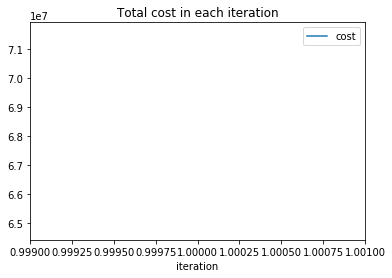

In [8]:
plot_list.plot(x="iteration", y="cost", title='Total cost in each iteration')
plt.savefig('Result/Total cost in each iteration.png')

In [9]:
# 計算結果テキストファイルの作成
f = open('Result/PSO_result_parameters.txt', 'w')  # 書き込みモードで開く
f_content = 'LCOE='+str(np.sum(PSO.best['SCL'])/np.sum(PSO.best['SEL']))+' global_best_position: '+str(PSO.best['global_best_position'])+' global_best_fitness_value: '+str(PSO.best['global_best_fitness_value'])+str(PSO.best["variables"]) + \
    str(PSO.initial_cost_parameters)+'SCL:'+str(PSO.best['SCL'])+'SEL:'+str(PSO.best['SEL'])
f.write(f_content)  # 引数の文字列をファイルに書き込む
f.close()  # ファイルを閉じる

In [10]:
PSO.best['SCL']

array([6963892.5081745 , 3312546.3494106 , 2966529.69813747,
       3314364.98536208, 3393576.46644401, 2966567.8905387 ,
       3314365.98545392, 3314365.98546649, 3045778.3960078 ,
       3314365.98546679, 3314365.98546679, 2966567.89103043,
       3393576.49044417, 3314365.98546679, 2966567.89103043,
       3314365.98546679, 3393576.49044417, 2966567.89103043,
       3314365.98546679, 3314365.98546679])

In [11]:
PSO.best['SEL']

array([11674.52929703, 11941.59136537, 11947.9972517 , 11948.14747209,
       11948.15099293, 11948.15107545, 11948.15107738, 11948.15107743,
       11948.15107743, 11948.15107743, 11948.15107743, 11948.15107743,
       11948.15107743, 11948.15107743, 11948.15107743, 11948.15107743,
       11948.15107743, 11948.15107743, 11948.15107743, 11948.15107743])

In [12]:
dir(PSO)

['Diesel_Cf',
 'Diesel_fc',
 'SCL',
 'SEL',
 'SOC_max',
 'SOC_min',
 'Target_input',
 'Target_input_len',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'battery_cap_max',
 'battery_charging_power',
 'battery_discharging_power',
 'battery_max',
 'battery_min',
 'best',
 'best_cost_list',
 'check',
 'df',
 'diesel_max',
 'fitness_variable_parameters',
 'flowchart_parameters',
 'flowchart_root',
 'global_best_list',
 'h',
 'initial_cost_parameters',
 'initial_input_values',
 'iteration_list',
 'np_PV_efficient',
 'np_Wind_efficient',
 'np_demand',
 'number_demand',
 'p_battery',
 'p_diesel',
 'parameters',
 'particle',
 'pv',
 'pv_cap_max',
 'pv_capacity_per_unit',
 'se